In [46]:
!pip install riskfolio-lib
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2020-01-01'
end = '2023-01-01'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

You should consider upgrading via the '/Volumes/Samsung_T7/dataAnalysisPlatform/venv/bin/python -m pip install --upgrade pip' command.
[*********************100%***********************]  25 of 25 completed


In [26]:
data

,AAPL,BA,JNJ,PEP,TSLA
Date,,,,,
2020-01-02,7334.7931%,33134.8572%,13309.6054%,12404.8058%,2868.4000%
2020-01-03,7263.4850%,33079.1901%,13155.5099%,12387.4519%,2953.4000%
2020-01-06,7321.3608%,33176.6083%,13139.0991%,12434.9457%,3010.2667%
2020-01-07,7286.9293%,33528.5156%,13219.3329%,12239.4928%,3127.0666%
2020-01-08,7404.1489%,32941.0095%,13217.5125%,12302.5116%,3280.9334%
...,...,...,...,...,...
2022-12-23,13147.7127%,18905.9998%,17489.3036%,18103.6636%,12315.0002%
2022-12-27,12965.2435%,18939.9994%,17484.3750%,18184.1202%,10909.9998%
2022-12-28,12567.4019%,18838.0005%,17408.4991%,18053.0060%,11270.9999%


In [47]:
# Calculate assets' returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,1.3013%,-0.1680%,-0.4309%,-0.8841%,-0.7935%,-0.5937%,-0.1237%,-0.7407%,-1.2506%,-1.7875%,...,0.8094%,-0.9810%,1.0784%,-1.5693%,0.5146%,-1.0391%,-1.0877%,-1.6271%,-1.0647%,-1.4111%
2020-01-06,-0.1946%,0.2945%,-0.2456%,0.3186%,-0.7554%,-0.1493%,0.1652%,0.7177%,0.3897%,1.2789%,...,-0.0365%,-0.3683%,0.3557%,-0.7841%,0.1024%,-0.9458%,0.7187%,0.0894%,-0.2152%,-1.2186%
2020-01-07,26.7941%,1.0607%,0.2345%,1.5084%,1.0571%,0.4486%,0.0623%,-1.7363%,0.2426%,-1.0442%,...,0.8762%,-0.6629%,-0.3964%,-1.1855%,0.3836%,0.1780%,0.5659%,-0.0446%,-1.1117%,-0.6070%
2020-01-08,0.6767%,-1.7523%,1.4505%,-0.1095%,1.0238%,-0.8560%,-1.7431%,1.2432%,1.3069%,0.8098%,...,0.1086%,1.3347%,0.1826%,1.1464%,0.3057%,-0.3231%,0.1590%,-1.3181%,0.1846%,0.9850%
2020-01-09,-0.3972%,1.4998%,-0.2191%,2.4898%,0.2644%,-0.7132%,0.5702%,0.9665%,1.4811%,0.6086%,...,0.3254%,-0.6459%,0.0421%,0.9489%,0.3063%,0.0810%,0.6443%,2.2187%,-0.4146%,0.6633%


In [28]:
Y

,AAPL,BA,JNJ,PEP,TSLA
Date,,,,,
2020-01-03,-0.9722%,-0.1680%,-1.1578%,-0.1399%,2.9633%
2020-01-06,0.7968%,0.2945%,-0.1247%,0.3834%,1.9255%
2020-01-07,-0.4703%,1.0607%,0.6106%,-1.5718%,3.8801%
2020-01-08,1.6086%,-1.7523%,-0.0138%,0.5149%,4.9205%
2020-01-09,2.1241%,1.4998%,0.2966%,0.0668%,-2.1945%
...,...,...,...,...,...
2022-12-23,-0.2798%,0.4303%,0.2542%,0.6461%,-1.7551%
2022-12-27,-1.3878%,0.1798%,-0.0282%,0.4444%,-11.4089%
2022-12-28,-3.0685%,-0.5385%,-0.4340%,-0.7210%,3.3089%


## 2. Mean Variance Portfolios (Markowitz Model)

### 2.1 Calculate the portfolio that maximizes Sharpe ratio.

In [48]:

import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Estimate input parameters:
method_mu='hist' # Selected method to estimate expected returns based on historical data.
method_cov='hist' # Selected method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov,
                  d=0.94)

# Estimate optimal portfolio:
# model: could be Classic (historical), BL (Black Litterman),
# FM (Factor Model) or BLFM ( Black Litterman with Factor Models)
model = 'Classic' 
# rm: Risk measure
rm = 'MV'
# obj: Objective Function, could be MinRisk, MaxRet, Utility or Sharpe
obj = 'Sharpe'
# hist: Use historical scenarios for risk measures based on scenarios,
# only used when model is FM or BLFM
hist = True # Use historical scenarios for risk measures that depend on scenarios
# rf: Risk free rate
rf = 0
# l: Risk aversion factor, only useful when obj is 'Utility'
l = 0

w = port.optimization(model=model,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      l=l,
                      hist=hist)

display(w)

,weights
APA,8.0594%
BA,0.0000%
BAX,0.0000%
BMY,0.0000%
CMCSA,0.0000%
CNP,0.0000%
CPB,21.5997%
DE,40.9663%
HPQ,0.0000%
JCI,0.0000%


### 2.2 Plot portfolio composition

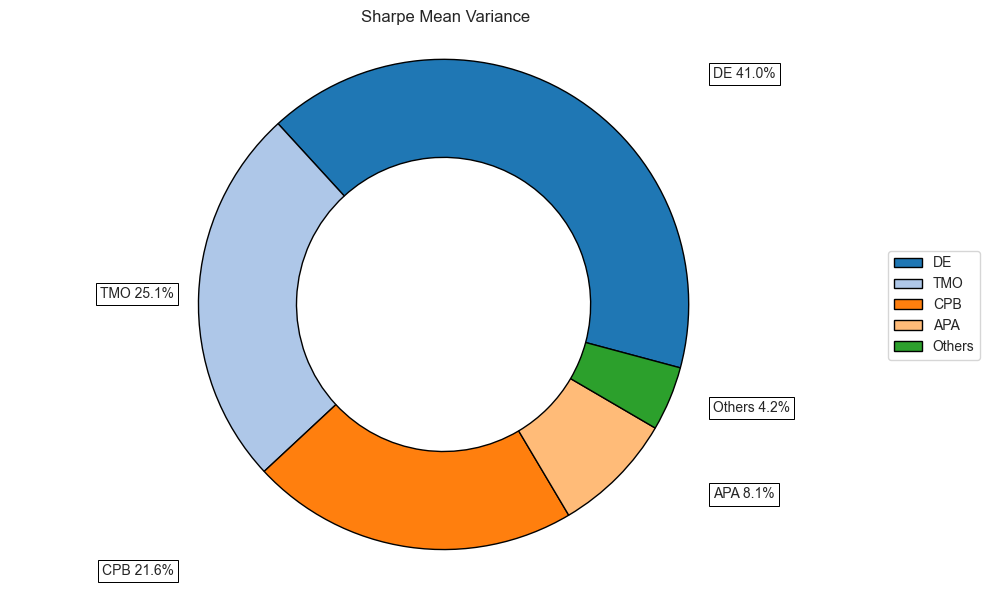

In [49]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [50]:
# Number of points of the frontier
points = 50

frontier = port.efficient_frontier(model=model,
                                   rm=rm,
                                   points=points,
                                   rf=rf,
                                   hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,24.8775%,0.0000%,0.0000%,18.2436%,0.0000%,0.0000%,0.0000%,...,0.0000%,6.8727%,3.9482%,0.0000%,0.0000%,1.2068%,5.6287%,0.0000%,36.2363%,0.0000%
1,1.0032%,0.0000%,0.0000%,23.5493%,0.0000%,0.0000%,28.2765%,12.6714%,0.0000%,0.0000%,...,0.0000%,1.2464%,9.6235%,1.5456%,0.0000%,0.3040%,12.9591%,0.0000%,5.3861%,0.0000%
2,2.9158%,0.0000%,0.0000%,16.5727%,0.0000%,0.0000%,30.4509%,21.2805%,0.0000%,0.0000%,...,0.0000%,0.0000%,11.1172%,0.0000%,0.0000%,0.0000%,17.6629%,0.0000%,0.0000%,0.0000%
3,4.4280%,0.0000%,0.0000%,6.6328%,0.0000%,0.0000%,30.0210%,27.5980%,0.0000%,0.0000%,...,0.0000%,0.0000%,10.1511%,0.0000%,0.0000%,0.0000%,21.1690%,0.0000%,0.0000%,0.0000%
4,5.7108%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,28.8852%,32.7700%,0.0000%,0.0000%,...,0.0000%,0.0000%,8.9557%,0.0000%,0.0000%,0.0000%,23.6782%,0.0000%,0.0000%,0.0000%


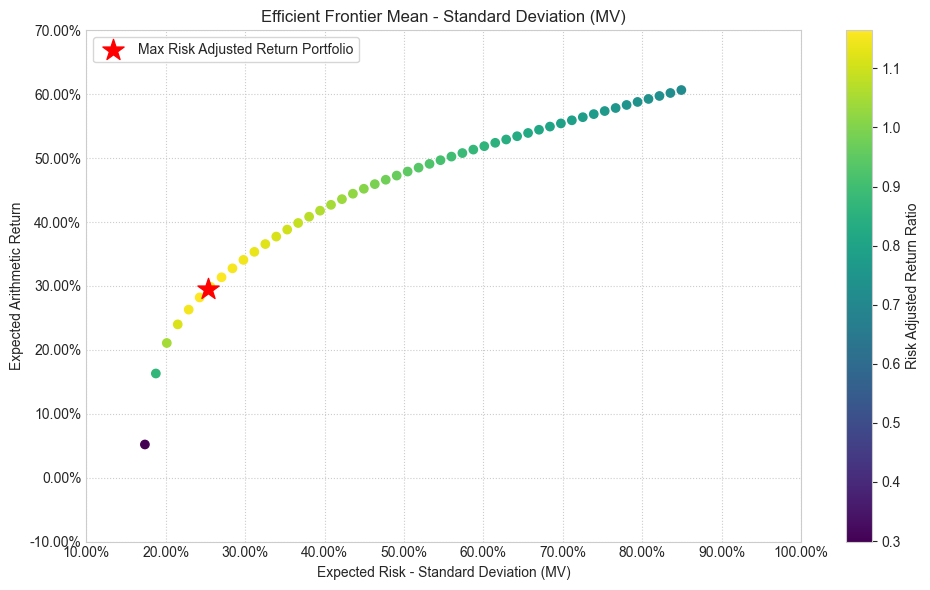

In [51]:
# Plot the efficient frontier

# Title of extra portfolio
label = 'Max Risk Adjusted Return Portfolio' 
# Expected returns
mu = port.mu
# Covariance matrix
cov = port.cov
# Assets' returns
returns = port.returns 

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=rf,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      ax=None)

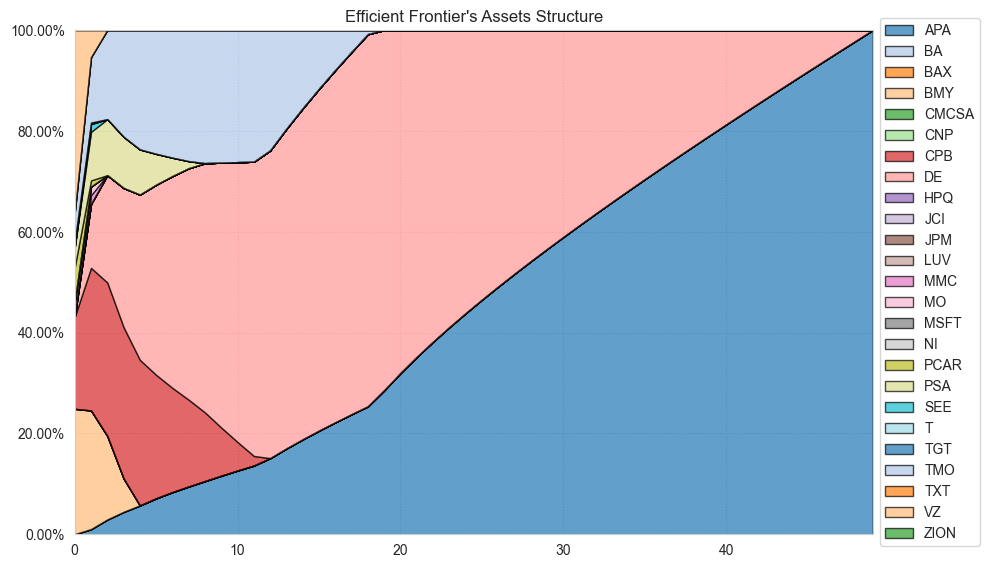

In [52]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier,
                           cmap="tab20",
                           n_colors=20,
                           height=6,
                           width=10,
                           ax=None)

## 3. Mean Risk Portfolios

In this part I will calculate the portfolio that maximizes the risk adjusted return ration when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Mean/CVaR ratio.

In [36]:
# rm: Risk measure
rm = 'CVaR'
# Significance level for CVaR
alpha = 0.05
port.alpha = alpha

w = port.optimization(model=model,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      l=l,
                      hist=hist)

display(w)

,weights
AAPL,0.0000%
BA,0.0000%
JNJ,51.4431%
PEP,0.0000%
TSLA,48.5569%


### 3.2 Plotting portfolio composition

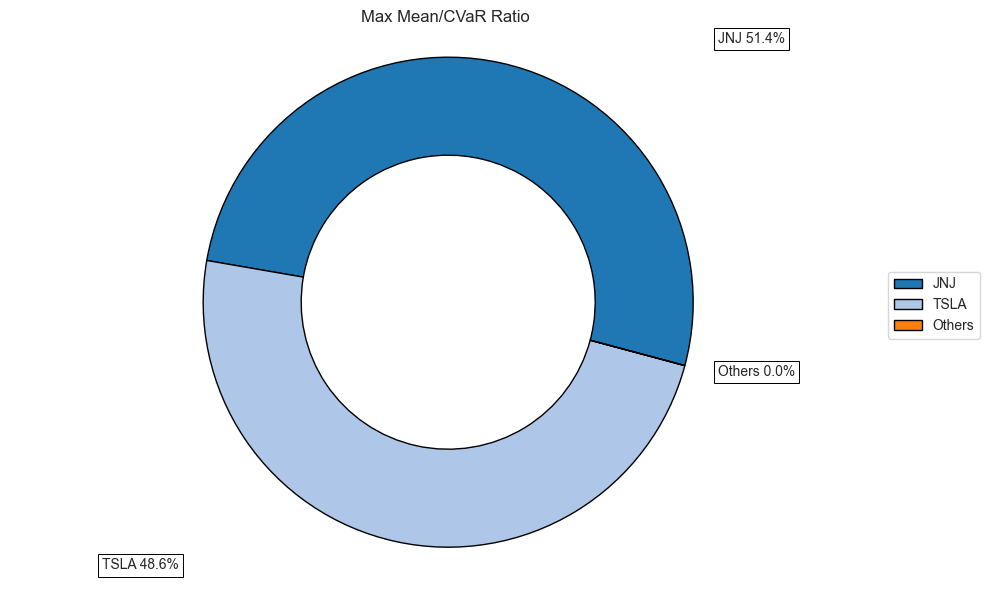

In [38]:
ax = rp.plot_pie(w=w,
                 title='Max Mean/CVaR Ratio',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 3.3 Calculate efficient frontier

In [39]:
# Number of points of the frontier
points = 50

frontier = port.efficient_frontier(model=model,
                                   rm=rm,
                                   points=points,
                                   rf=rf,
                                   hist=hist)

display(frontier.T.head())

,AAPL,BA,JNJ,PEP,TSLA
0,0.0000%,0.0000%,78.0206%,19.8477%,2.1317%
1,0.0000%,0.0000%,67.2469%,20.5443%,12.2088%
2,0.0000%,0.0000%,64.3349%,19.0661%,16.5990%
3,0.0000%,0.0000%,62.6578%,17.7601%,19.5821%
4,0.0000%,0.0000%,64.6695%,12.9243%,22.4062%


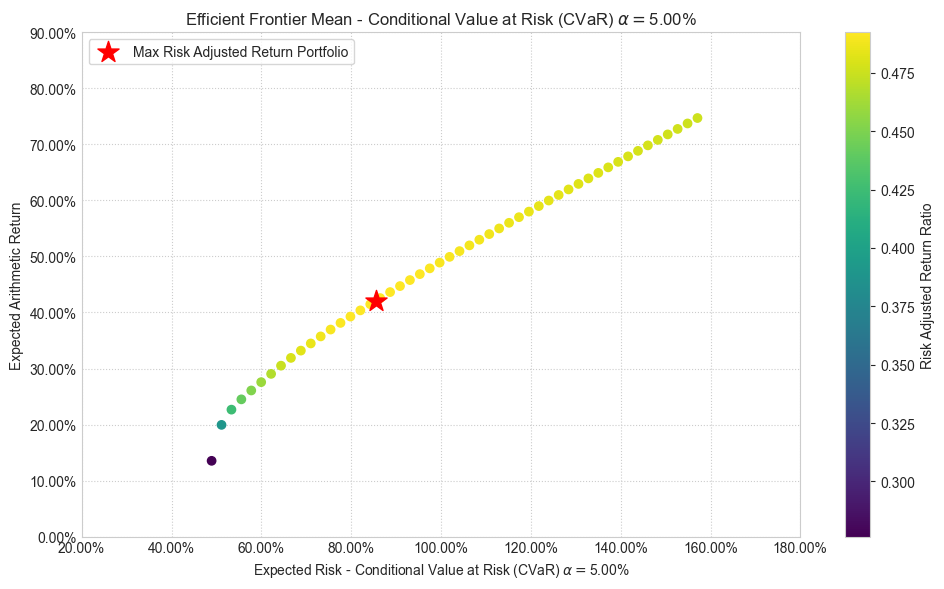

In [40]:
# Title of point
label = 'Max Risk Adjusted Return Portfolio' 

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=rf,
                      alpha=alpha,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      ax=None)

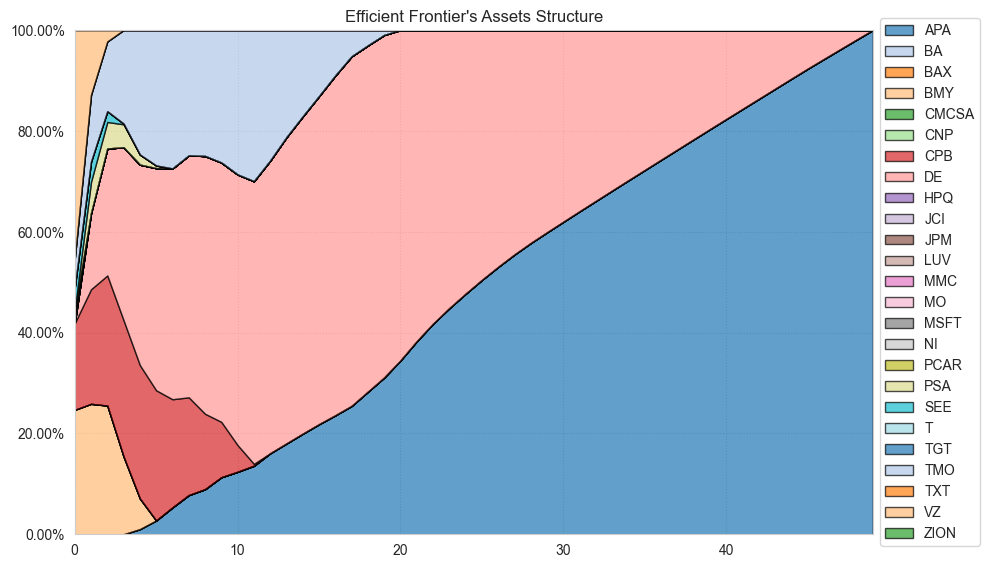

In [12]:
# Plot efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier,
                           cmap="tab20",
                           height=6,
                           width=10,
                           ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [42]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'RlVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'RlDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

# Change solver to speed up calculation
port.solvers = ['MOSEK']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          rm=i,
                          obj=obj,
                          rf=rf,
                          l=l,
                          hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters
The problem doesn't have a solution with actual input parameters


ValueError: Length mismatch: Expected axis has 0 elements, new values have 13 elements

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.16%,7.63%,4.38%,6.11%,3.98%,0.00%,1.55%,0.00%,1.20%,6.79%,2.81%,6.34%,0.00%
BAX,11.50%,9.24%,10.37%,9.04%,10.62%,12.35%,4.46%,0.00%,0.00%,4.48%,0.00%,4.34%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.48%,7.21%,9.15%,5.96%,9.38%,7.49%,30.26%,28.96%,56.01%,13.49%,32.93%,18.16%,42.77%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.82%,2.73%,1.18%,2.33%,0.90%,5.14%,0.00%,0.00%,13.08%,1.49%,0.82%,1.01%,2.98%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

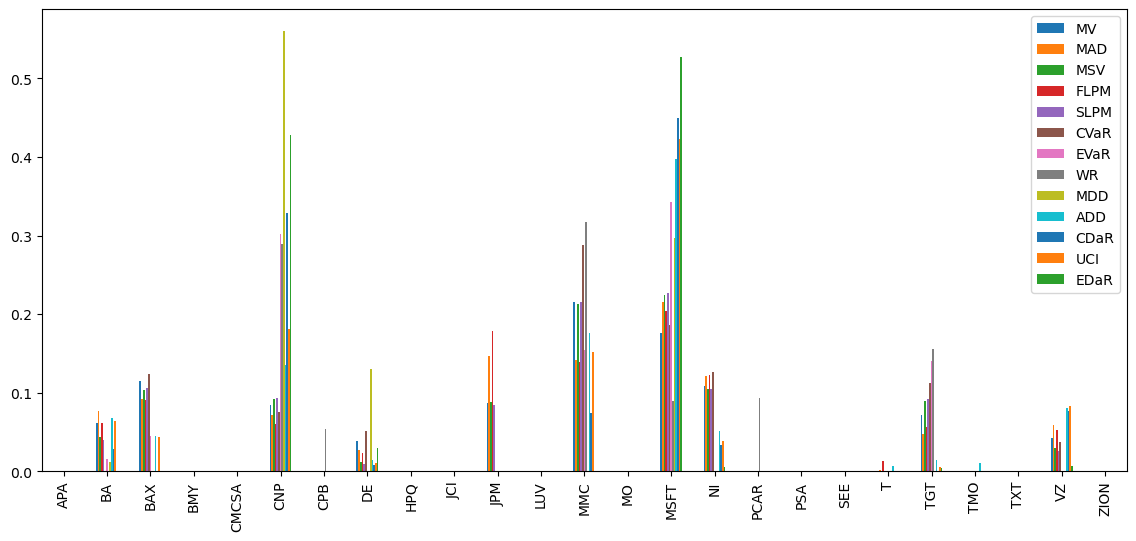

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4. Constraints on Assets and Assets Classes

### 4.1 Create the constraints

In this part I use excel files to create the constraints and upload the values using pd.read_excel command.

In [ ]:
asset_classes = pd.read_excel("asset_classes.xlsx", index_col=0)
asset_classes = asset_classes.sort_values(by=['Assets'])

display(asset_classes)

,Assets,Industry
0,APA,Energy
1,BA,Financials
2,BAX,Health Care
3,BMY,Health Care
4,CMCSA,Consumer Discretionary
5,CNP,Utilities
6,CPB,Consumer Staples
7,DE,Industrials
8,HPQ,Information Technology
9,JCI,Consumer Discretionary


In [ ]:
constraints = pd.read_excel("constraints.xlsx", index_col=0).fillna('')

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Assets,,MMC,<=,8.0000%,,,,
1,False,All Assets,,,<=,10.0000%,,,,
2,False,Classes,Industry,Financials,<=,15.0000%,,,,
3,False,Classes,Industry,Utilities,<=,15.0000%,,,,
4,False,Classes,Industry,Industrials,<=,15.0000%,,,,
5,False,Classes,Industry,Consumer Discretionary,<=,15.0000%,,,,


In [ ]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimization with Linear Constraints

In [ ]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      l=l,
                      hist=hist)

display(w)

,weights
APA,0.0000%
BA,3.1452%
BAX,10.0000%
BMY,0.0000%
CMCSA,5.0000%
CNP,7.4068%
CPB,0.0000%
DE,10.0000%
HPQ,0.0000%
JCI,0.0000%


### 4.3 Plotting portfolio composition

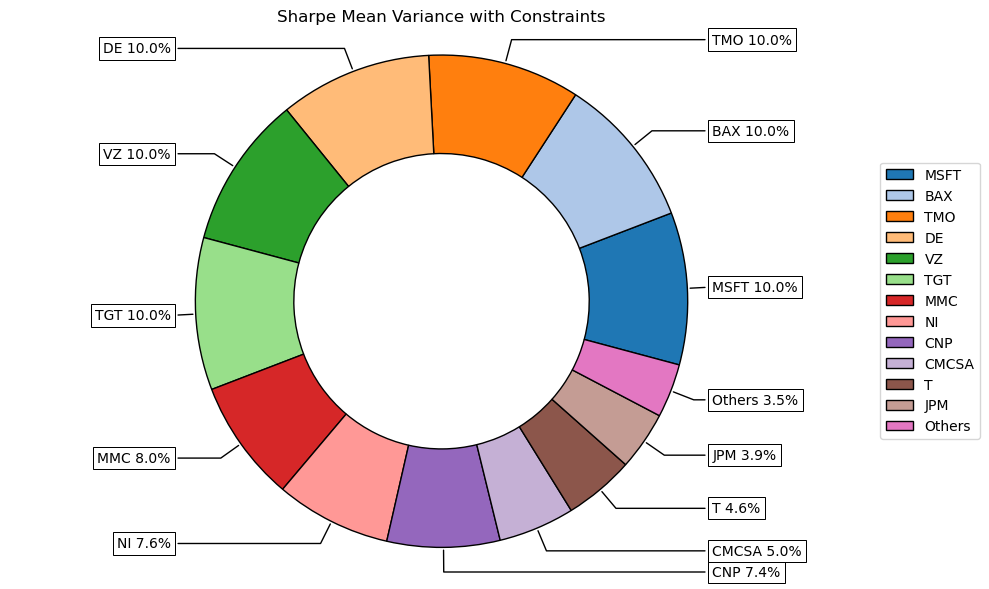

In [ ]:
ax = rp.plot_pie(w=w,
                 title='Sharpe Mean Variance with Constraints',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 4.4 Plotting portfolio composition by Asset Class

In [ ]:
# Group weights by asset class

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,15.0000%
Consumer Staples,0.0000%
Energy,0.0000%
Financials,15.0000%
Health Care,20.0000%
Industrials,10.3850%
Information Technology,10.0000%
Materials,0.0000%
Telecommunications Services,14.6150%


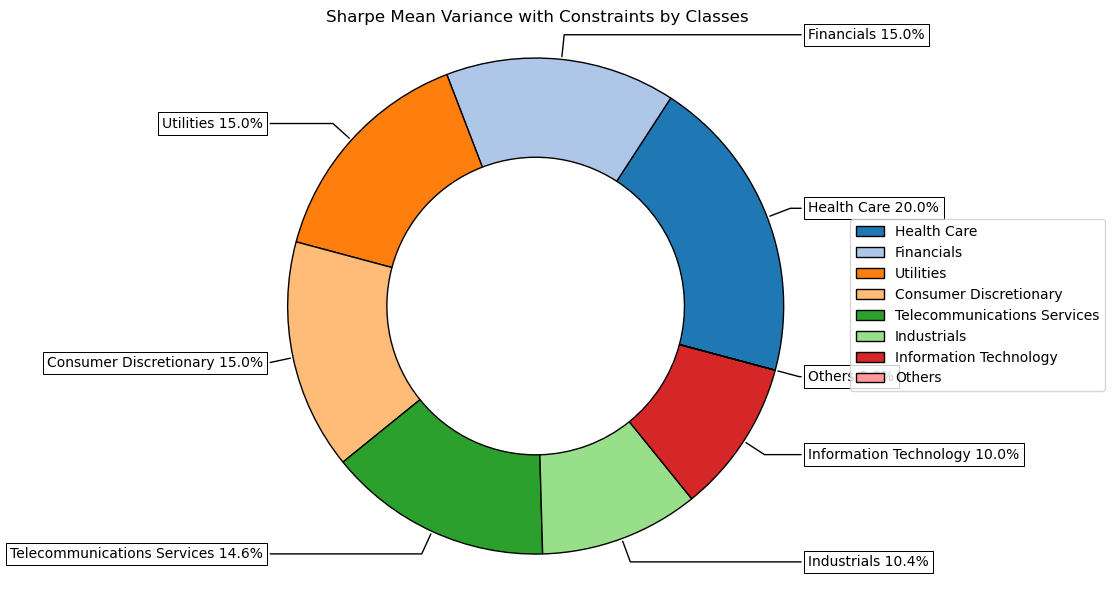

In [ ]:
ax = rp.plot_pie(w=w_classes,
                 title='Sharpe Mean Variance with Constraints by Classes',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

## 5. Constraints on Environmental, Social and Governance (ESG)

### 5.1 Download Data from Yahoo Finance and create loadings matrix

In [ ]:
import urllib.request
import json

df = pd.DataFrame()
url = "https://query2.finance.yahoo.com/v1/finance/esgChart?symbol="

for symbol in assets:
    connection = urllib.request.urlopen(url + symbol)
    data = connection.read()
    data_2 = json.loads(data)
    Formatdata = data_2["esgChart"]["result"][0]["symbolSeries"]
    Formatdata = pd.DataFrame(Formatdata)
    Formatdata["timestamp"] = pd.to_datetime(Formatdata["timestamp"], unit="s")
    Formatdata = Formatdata.iloc[-1,:].to_frame()
    Formatdata.columns = [symbol]
    df = pd.concat([df, Formatdata], axis=1)

pd.options.display.float_format = '{:.4}'.format
loadings = df.iloc[1:,:].T
display(loadings)

,esgScore,governanceScore,environmentScore,socialScore
APA,38.81,7.96,21.98,8.88
BA,34.68,7.87,7.08,19.72
BAX,23.74,7.31,2.83,13.6
BMY,22.83,7.56,0.34,14.93
CMCSA,24.76,8.09,4.56,12.11
CNP,25.56,5.42,10.58,9.56
CPB,23.55,4.47,10.93,8.15
DE,16.64,6.55,3.19,6.9
HPQ,10.93,5.82,0.11,5.0
JCI,14.7,5.25,4.89,4.55


### 5.2 Create the constraints

In [ ]:
factors_constraints = pd.read_excel("factors_constraints.xlsx", index_col=0).fillna('')

display(factors_constraints)

,Disabled,Factor,Sign,Value,Relative Factor
0,False,esgScore,>=,25,


In [ ]:
C, D = rp.factors_constraints(factors_constraints, loadings)

In [ ]:
# Here we combine new constraints with old constraints
A = np.vstack([A, C])
B = np.vstack([B, D])

### 5.3 Optimization with ESG constraints

In [ ]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      l=l,
                      hist=hist)

pd.options.display.float_format = '{:.4%}'.format
display(w)

,weights
APA,0.0000%
BA,5.0000%
BAX,10.0000%
BMY,0.0000%
CMCSA,8.5928%
CNP,5.0000%
CPB,1.0616%
DE,5.8326%
HPQ,0.0000%
JCI,0.0000%


### 5.4 Plotting portfolio composition

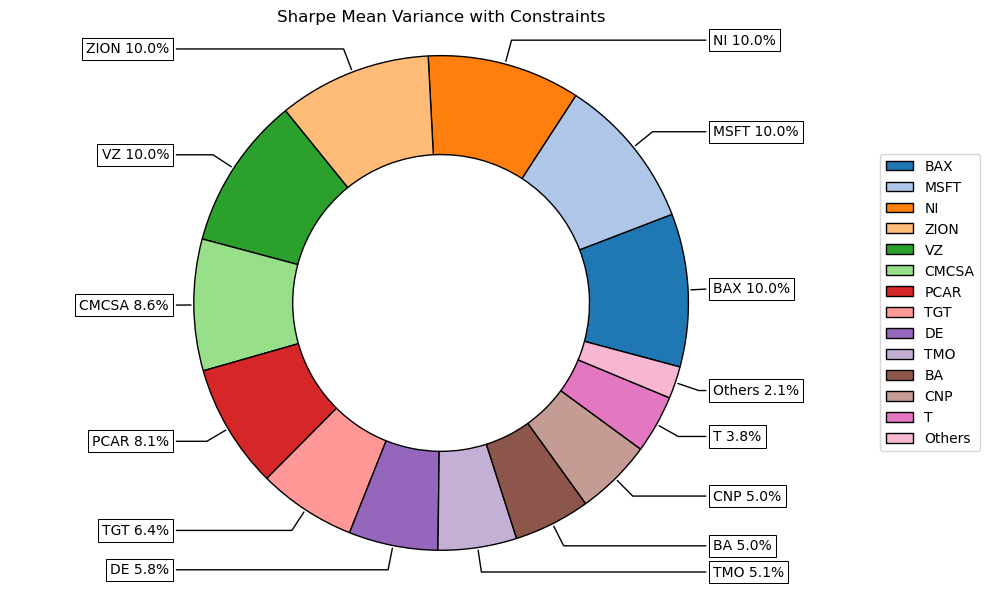

In [ ]:
ax = rp.plot_pie(w=w,
                 title='Sharpe Mean Variance with Constraints',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 5.5 Show ESG Score of the Portfolio

In [ ]:
pd.options.display.float_format = '{:.4}'.format

loadings.T @ w

,weights
esgScore,25.0
governanceScore,10.94
environmentScore,8.331
socialScore,15.34
